In [109]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [111]:
raw_df = pd.read_csv('salary_prediction_data.csv')

In [113]:
raw_df

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175
...,...,...,...,...,...,...,...
995,High School,8,Suburban,Analyst,25,Female,64683.389864
996,High School,24,Urban,Engineer,30,Female,74468.205020
997,Master,18,Rural,Analyst,44,Male,98207.026024
998,Bachelor,27,Suburban,Director,31,Female,108544.922720


In [115]:
raw_df['Job_Title'].unique()

array(['Manager', 'Director', 'Analyst', 'Engineer'], dtype=object)

In [117]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [119]:
raw_df.describe()

,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


In [121]:
raw_df.duplicated().sum()

0

In [123]:
raw_df.columns

Index(['Education', 'Experience', 'Location', 'Job_Title', 'Age', 'Gender',
       'Salary'],
      dtype='object')

### EDA

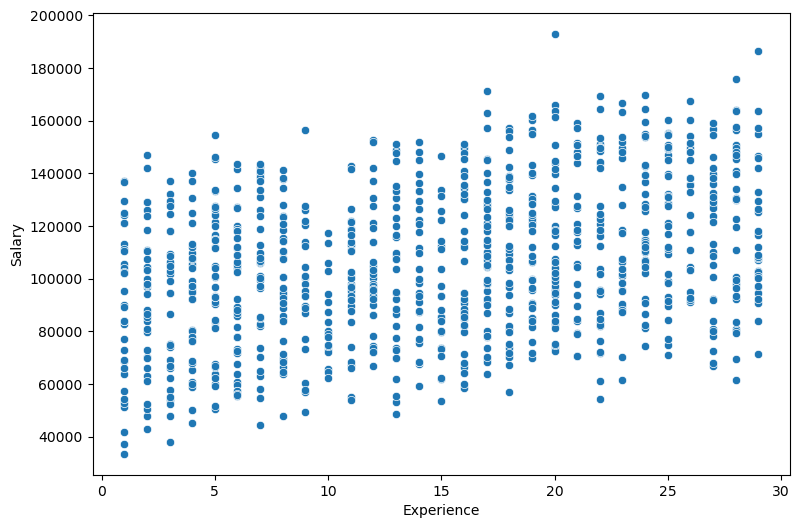

In [126]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=raw_df,y='Salary',x='Experience')
plt.show()

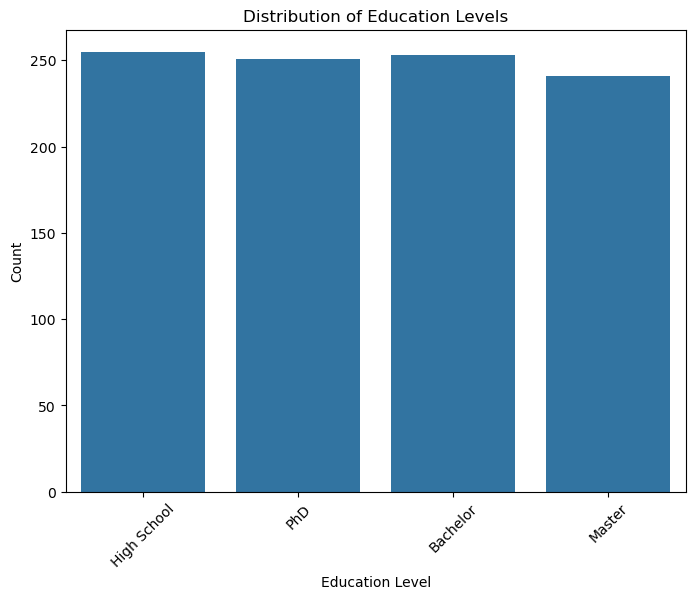

In [128]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=raw_df)
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

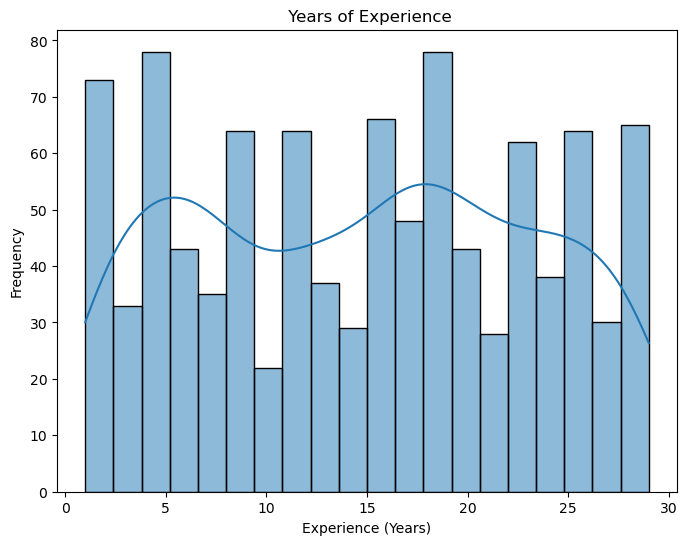

In [130]:
plt.figure(figsize=(8, 6))
sns.histplot(raw_df['Experience'], bins=20, kde=True)
plt.title(' Years of Experience')
plt.xlabel('Experience (Years)')
plt.ylabel('Frequency')
plt.show()

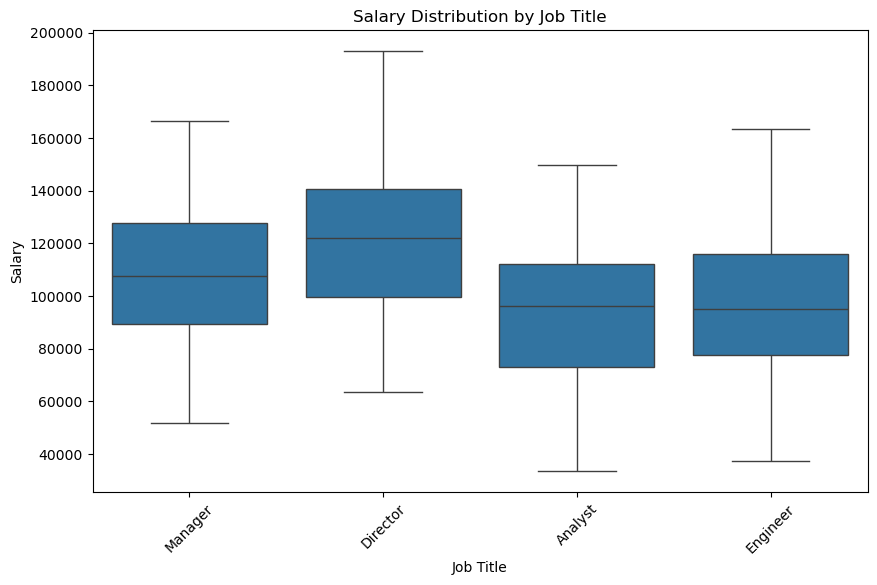

In [132]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Job_Title', y='Salary', data=raw_df)
plt.title('Salary Distribution by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

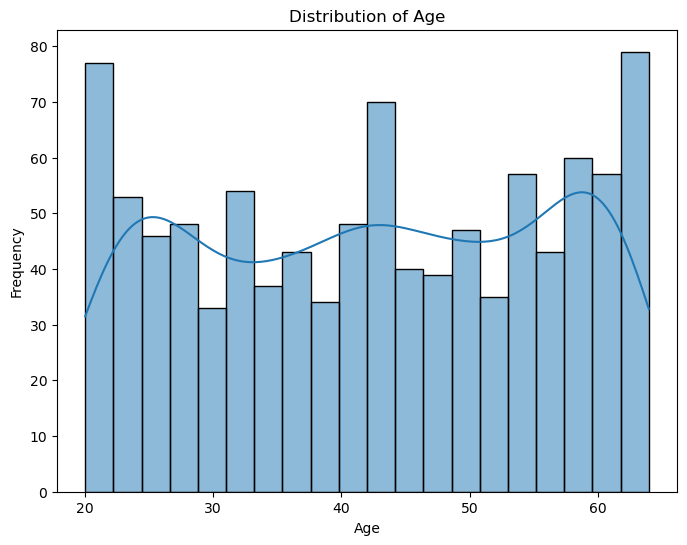

In [134]:
plt.figure(figsize=(8, 6))
sns.histplot(raw_df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

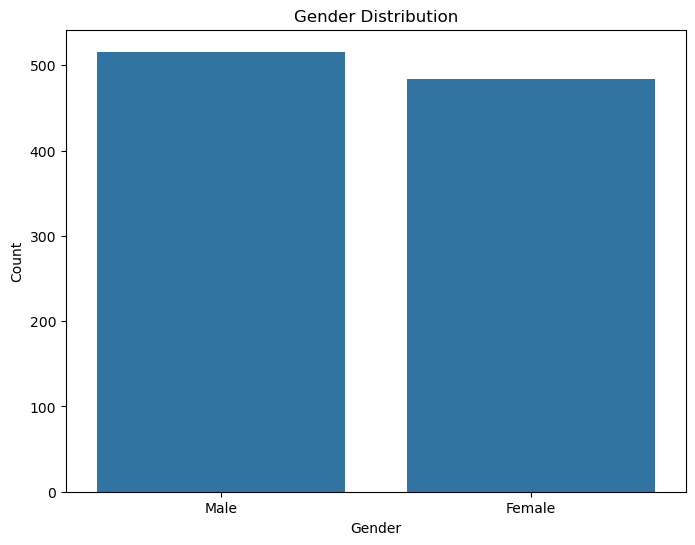

In [136]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=raw_df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Preprocessing

In [139]:
from sklearn.model_selection import train_test_split

Splitting 70 - 30 as datasets is too small


In [142]:
train_df,test_df = train_test_split(raw_df,test_size = 0.3,random_state=42)

In [144]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 541 to 102
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   700 non-null    object 
 1   Experience  700 non-null    int64  
 2   Location    700 non-null    object 
 3   Job_Title   700 non-null    object 
 4   Age         700 non-null    int64  
 5   Gender      700 non-null    object 
 6   Salary      700 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 43.8+ KB


In [146]:
input_cols = list(raw_df.columns[:-1])
target_cols = 'Salary'

In [148]:
input_cols

['Education', 'Experience', 'Location', 'Job_Title', 'Age', 'Gender']

In [150]:
train_input = train_df[input_cols].copy()
train_target = train_df[target_cols].copy()

In [152]:
train_input

,Education,Experience,Location,Job_Title,Age,Gender
541,Bachelor,20,Suburban,Director,59,Female
440,PhD,20,Urban,Director,35,Female
482,High School,28,Suburban,Analyst,50,Female
422,High School,2,Urban,Engineer,38,Male
778,PhD,1,Rural,Manager,26,Female
...,...,...,...,...,...,...
106,High School,27,Suburban,Engineer,21,Female
270,Bachelor,7,Rural,Engineer,22,Male
860,Master,2,Rural,Engineer,26,Female
435,High School,1,Suburban,Engineer,39,Male


In [154]:
test_input = test_df[input_cols].copy()
test_target = test_df[target_cols].copy()

In [156]:
raw_df.isna().sum()

Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64

In [158]:
raw_df.columns

Index(['Education', 'Experience', 'Location', 'Job_Title', 'Age', 'Gender',
       'Salary'],
      dtype='object')

In [160]:
numeric_col = ['Experience','Age']
categorical_col = ['Education', 'Location', 'Job_Title','Gender']

In [162]:
train_df[numeric_col]

,Experience,Age
541,20,59
440,20,35
482,28,50
422,2,38
778,1,26
...,...,...
106,27,21
270,7,22
860,2,26
435,1,39


In [164]:
from sklearn.preprocessing import StandardScaler

In [166]:
scaler = StandardScaler()

In [168]:
scaler.fit(train_df[numeric_col])

StandardScaler()

In [170]:
train_input[numeric_col] = scaler.transform(train_input[numeric_col])
test_input[numeric_col] = scaler.transform(test_input[numeric_col])

In [172]:
test_input.describe()

,Experience,Age
count,300.000000,300.000000
mean,0.023528,0.073286
std,1.041251,1.022828
min,-1.664690,-1.634489
25%,-0.936312,-0.820206
50%,0.034858,0.142129
75%,0.884632,1.030439
max,1.734406,1.622645


In [174]:
from sklearn.preprocessing import OneHotEncoder

In [176]:
encoder = OneHotEncoder(sparse_output=False,handle_unknown = 'ignore').fit(train_df[categorical_col])

In [178]:
encoded_col = list(encoder.get_feature_names_out(categorical_col))

In [180]:
encoded_col

['Education_Bachelor',
 'Education_High School',
 'Education_Master',
 'Education_PhD',
 'Location_Rural',
 'Location_Suburban',
 'Location_Urban',
 'Job_Title_Analyst',
 'Job_Title_Director',
 'Job_Title_Engineer',
 'Job_Title_Manager',
 'Gender_Female',
 'Gender_Male']

In [182]:
train_input[encoded_col] = encoder.fit_transform(train_input[categorical_col])
test_input[encoded_col] = encoder.fit_transform(test_input[categorical_col])

In [184]:
X_train = train_input[numeric_col + encoded_col]
X_test = test_input[numeric_col + encoded_col]

In [186]:
from sklearn.metrics import mean_squared_error

In [188]:
def rmse(train_pred,train_target):
    return mean_squared_error(train_pred,train_target , squared = False)

Function to try different models

In [191]:
def try_diff_model(model):
    model.fit(X_train,train_target)
    train_rmse = rmse(model.predict(X_train),train_target)
    test_rmse = rmse(model.predict(X_test),test_target)
    return train_rmse , test_rmse

In [193]:
from sklearn.linear_model import LinearRegression

In [195]:
model = LinearRegression()

In [197]:
model.fit(X_train,train_target)

LinearRegression()

In [199]:
pred = model.predict(X_train)

In [201]:
try_diff_model(model)

C:\Users\Sachin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Sachin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(9743.50415185243, 10271.931284369048)

In [203]:
from sklearn.linear_model import Ridge

In [205]:
model_r = Ridge(alpha=0.1)

In [207]:
try_diff_model(model_r)

C:\Users\Sachin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Sachin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(9743.51414022672, 10271.68736803659)

In [209]:
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,train_target)
y_pred = lr.predict(X_test)

print(r2_score(y_pred,test_target))

0.8658456517535109
